In [ ]:
# 1. Problem Statement 
# to check whether student pass fail or got distinction in exam

In [ ]:
# 2. Data Gathering 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
!pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [3]:
df = pd.read_excel("student.xlsx")
df.head(2)

,Total marks out of 1500,Percentage,CGPA,Remark
0,1273,84.866667,9.01,2
1,1235,82.333333,8.53,2


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

In [39]:
x= df.drop('Remark',axis = 1)
y = df['Remark']
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((25, 3), (12, 3), (25,), (12,))

In [40]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-Sequared Value = {r2}")

MSE = 0.6266666666666665
RMSE = 0.7916228058025278
MAE = 0.7333333333333331
R-Sequared Value = -0.12799999999999967


In [ ]:
# 3. EDA [Exploratory Data Analysis]

<AxesSubplot:>

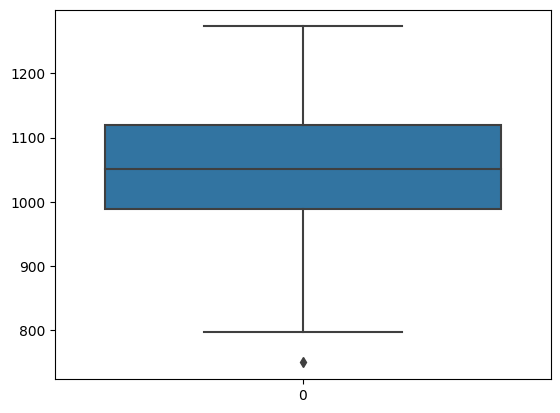

In [4]:
import seaborn as sns
sns.boxplot(df['Total marks out of 1500'])

In [5]:
from scipy.stats import zscore
def get_outlier(df,feature,thresh):
    z_val = zscore(df[feature])
    outlier_index = np.where(z_val>thresh)[0]
    print(df[feature].iloc[outlier_index])
    return list(outlier_index)
get_outlier(df,'CGPA',1)

0     9.01
2     8.97
4     8.95
5     9.00
20    9.01
Name: CGPA, dtype: float64


[0, 2, 4, 5, 20]

In [6]:
get_outlier(df,'Percentage',1)

0    84.866667
1    82.333333
2    82.200000
3    79.400000
4    78.666667
5    77.866667
Name: Percentage, dtype: float64


[0, 1, 2, 3, 4, 5]

In [7]:
get_outlier(df,'Total marks out of 1500',1)

0    1273
1    1235
2    1233
3    1191
4    1180
5    1168
Name: Total marks out of 1500, dtype: int64


[0, 1, 2, 3, 4, 5]

In [8]:
mean =np.mean(df['Total marks out of 1500'])
mean

1043.6756756756756

In [9]:
z_val = zscore(df['Total marks out of 1500'])
outlier_index = np.where(z_val>1)[0]
list(outlier_index)

[0, 1, 2, 3, 4, 5]

In [10]:
df['Total marks out of 1500'].loc[df['Total marks out of 1500']>1]=mean

C:\Users\BA001AX\AppData\Local\Temp\ipykernel_8552\2271496815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total marks out of 1500'].loc[df['Total marks out of 1500']>1]=mean


In [11]:
get_outlier(df,'Total marks out of 1500',1)

Series([], Name: Total marks out of 1500, dtype: float64)


[]

In [12]:
mean_p =np.mean(df['Percentage'])
mean_p

69.57837837837836

In [13]:
df['Percentage'].loc[df['Percentage']>1]=mean_p

C:\Users\BA001AX\AppData\Local\Temp\ipykernel_8552\2249070559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Percentage'].loc[df['Percentage']>1]=mean_p


In [14]:
get_outlier(df,'Percentage',1)

Series([], Name: Percentage, dtype: float64)


[]

In [15]:
mean_c =np.mean(df['CGPA'])
mean_c

7.930000000000001

In [16]:
df['CGPA'].loc[df['CGPA']>1]=mean_c

C:\Users\BA001AX\AppData\Local\Temp\ipykernel_8552\3165347914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CGPA'].loc[df['CGPA']>1]=mean_c


In [17]:
get_outlier(df,'CGPA',1)

Series([], Name: CGPA, dtype: float64)


[]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

In [33]:
x= df.drop('Remark',axis = 1)
y = df['Remark']

In [34]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((25, 3), (12, 3), (25,), (12,))

In [35]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train) 

LinearRegression()

In [36]:

y_pred = lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-Sequared Value = {r2}")

MSE = 0.6266666666666665
RMSE = 0.7916228058025278
MAE = 0.7333333333333331
R-Sequared Value = -0.12799999999999967


In [37]:
y_pred_train = lin_model.predict(x_train)

print(f"Training Data Metric")
mse = mean_squared_error(y_train, y_pred_train)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_train, y_pred_train)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred_train)
print(f"R-Sequared Value = {r2}")

Training Data Metric
MSE = 0.8
RMSE = 0.8944271909999159
MAE = 0.816
R-Sequared Value = 0.0
